In [20]:
import xarray as xr 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import netCDF4 
import glob 
from glob import glob

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import cmocean
import cmocean.cm as cmo

In [23]:
ds_transect


<xarray.Dataset>
Dimensions:         (tracer: 6, s_rho: 30, s_w: 31, eta_rho: 11, xi_rho: 671,
                     eta_u: 191, xi_u: 670, eta_v: 190, xi_v: 671,
                     eta_psi: 190, xi_psi: 670)
Coordinates:
  * s_rho           (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
  * s_w             (s_w) float64 -1.0 -0.9667 -0.9333 ... -0.06667 -0.03333 0.0
    lon_rho         (eta_rho, xi_rho) float64 ...
    lat_rho         (eta_rho, xi_rho) float64 ...
    lon_u           (eta_u, xi_u) float64 ...
    lat_u           (eta_u, xi_u) float64 ...
    lon_v           (eta_v, xi_v) float64 ...
    lat_v           (eta_v, xi_v) float64 ...
    lon_psi         (eta_psi, xi_psi) float64 ...
    lat_psi         (eta_psi, xi_psi) float64 ...
    ocean_time      datetime64[ns] 2022-05-06T01:00:00
Dimensions without coordinates: tracer, eta_rho, xi_rho, eta_u, xi_u, eta_v,
                                xi_v, eta_psi, xi_psi
Data variables: (12/101)
    ntimes          int32 4320
    ndtfast         int32 40
    dt              float64 20.0
    dtfast          float64 0.5
    dstart          datetime64[ns] 2022-05-06
    shuffle         int32 1
    ...              ...
    Uwind           (eta_rho, xi_rho) float32 ...
    Vwind           (eta_rho, xi_rho) float32 ...
    shflux          (eta_rho, xi_rho) float32 ...
    ssflux          (eta_rho, xi_rho) float32 ...
    sustr           (eta_u, xi_u) float32 ...
    svstr           (eta_v, xi_v) float32 ...
Attributes: (12/33)
    file:              /scratch/user/d.kobashi/projects/ROFS/projects/txla2/o...
    format:            netCDF-4/HDF5 file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             TXLA Regional Ocean Forecast Sysetm (ROFS) with dyes a...
    var_info:          varinfo.dat
    ...                ...
    compiler_command:  /sw/eb/sw/impi/2019.9.304-iccifort-2020.4.304/intel64/...
    compiler_flags:    -fp-model fast -heap-arrays -ip -O3
    tiling:            010x012
    history:           ROMS/TOMS, Version 3.7, Saturday - May 7, 2022 -  3:46...
    ana_file:          /scratch/user/d.kobashi/source_code/COAWST/Functionals...
    CPP_options:       TXLA2, ANA_BPFLUX, ANA_BSFLUX, ANA_BTFLUX, ANA_SPFLUX,...

ValueError: x and y must have same first dimension, but have shapes (30, 11, 671) and (11, 671)

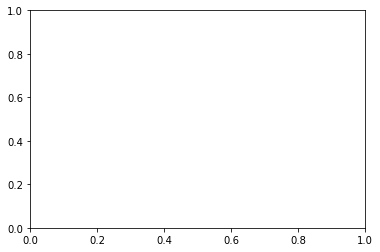

In [34]:
# Load the ROMS output file
ds = xr.open_dataset('../../MODEL_DATA/TXLA2.ocn.his.2022_05_06_a.nc')

# Select the first time step
ds_t1 = ds.isel(ocean_time=0)

# Select the transect from the shore to the ocean
ds_transect = ds_t1.sel(eta_rho=slice(-98, -87))

# Extract the variables you want to plot
temperature = ds_transect.temp
salinity = ds_transect.salt
depth = ds_transect.lon_rho

# Plot the profile
plt.plot(temperature, depth)
plt.plot(salinity, depth)

# Add labels and titles
plt.xlabel('Temperature (°C) / Salinity (PSU)')
plt.ylabel('Depth (m)')
plt.title('Transect Profile at Time 1')
plt.legend(['Temperature', 'Salinity'])

# Show the plot
plt.show()
